# Africa Economic, Banking and Systemic Crisis Data Visualization

- About dataset:

This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

It specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [44]:
library(tidyverse)

In [45]:
df = read.csv(
    'https://raw.githubusercontent.com/RanHao000/bios512/master/african_crises.csv'
)

# 1. Frequencies of systemic crisis by the country


- Central African Republic, Zimbabwe, Kenya, and Nigeria are among the four countries with the highest frequencies of systemic crises.
- Angola, Mauritius and South Africa have never experienced a systemic crisis.

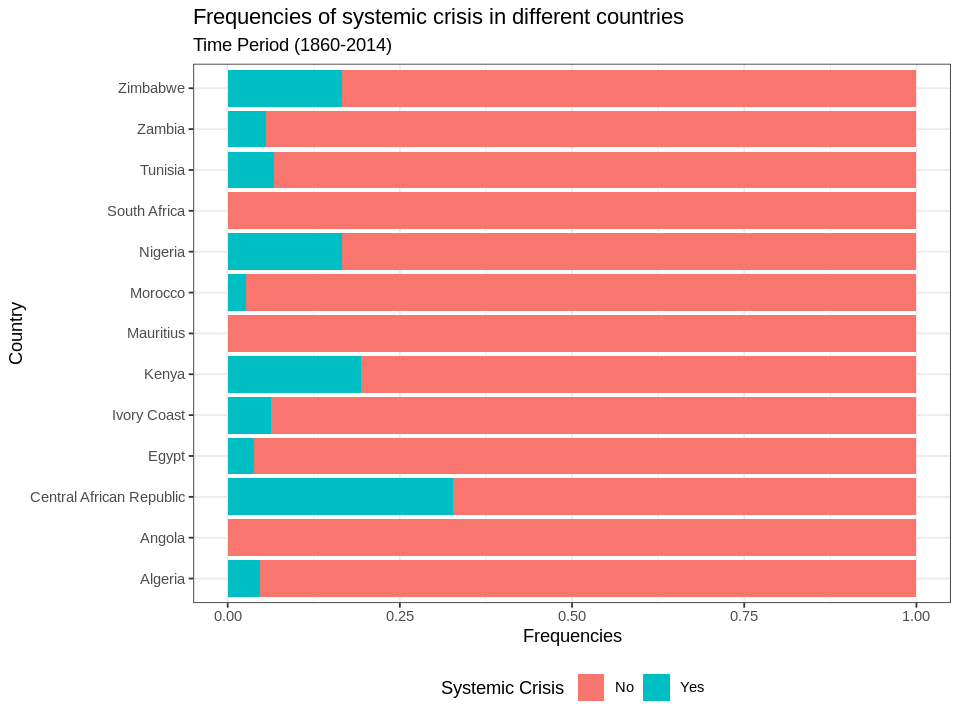

In [46]:
options(repr.plot.width = 8, repr.plot.height = 6)

df %>% 
mutate(systemic_crisis = ifelse(systemic_crisis == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(systemic_crisis) %>% 
spread(systemic_crisis, n) %>% 
mutate(yes = ifelse(is.na(yes), 0, yes)) %>% 
gather('no', 'yes', key = 'systemic_crisis', value = "cases") %>% 
data.frame() %>% 
ggplot(aes(x = country, y = cases, fill = systemic_crisis)) + geom_col(position = 'fill') +
theme_bw() +
labs(x = 'Country', y = 'Frequencies',
     title = 'Frequencies of systemic crisis in different countries',
     subtitle = 'Time Period (1860-2014)') +
theme(legend.position="bottom") +
scale_fill_discrete(name = "Systemic Crisis", labels = c('No', 'Yes')) +
coord_flip()

#  2.Cross domestic product weighted default in different countires

- Algeria, Egypt, Morocco, South Africa, and Tunisia were the only available countries with a GDP weighted default different of zero.

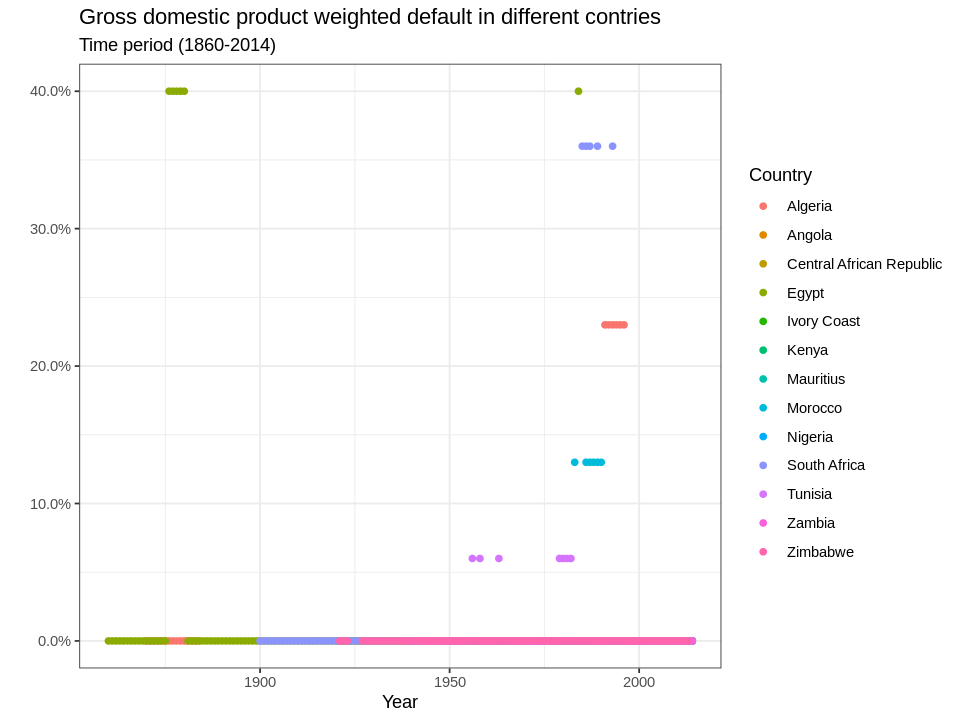

In [47]:
df2 = 
df %>% 
mutate(gdp_weighted_default = as.numeric(as.character(gdp_weighted_default))) %>% 
dplyr::select(country, year, gdp_weighted_default)  %>% 
rename(Country = country) %>% 
arrange(desc(gdp_weighted_default))  

p = ggplot(df2, aes(x = year, y = gdp_weighted_default, color = Country)) 
p = p + geom_point() + scale_y_continuous(labels=scales::percent) + theme_bw()
p = p +labs(x = 'Year', y = '', 
     title = 'Gross domestic product weighted default in different contries',
    subtitle = 'Time period (1860-2014)') + theme(legend.position="right")
p
